Data Analytics II
 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

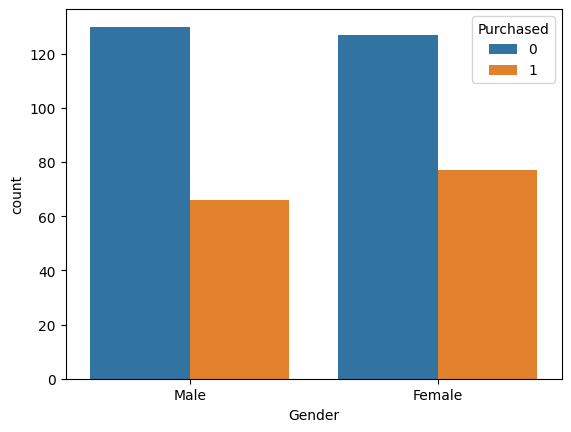

In [5]:
sns.countplot(data = df,x= 'Gender',hue='Purchased')

In [6]:
gender_mapping ={'Male':1,'Female':0}

df['Gender'] = df['Gender'].map(gender_mapping)

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [8]:
x=df['Age'].values.reshape(-1,1)
scaler = StandardScaler()
x=scaler.fit_transform(x)
y=df['Purchased'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
cf = confusion_matrix(y_test,pred_y)

TP = cf[1, 1]
FP = cf[0, 1]
TN = cf[0, 0]
FN = cf[1, 0]
print(f"TP : {TP}\nFP : {FP}\nFN : {FN}\nTN : {TN}\n")
print(cf)
ac = accuracy_score(y_test,pred_y)
print(ac)
print(f"error rate : {1-ac}")
pr = precision_score(y_test,pred_y)
print(f"precision : {pr}")
p  =  TP
p/=(TP+FP)
print(f"precision : {p}")
rc = recall_score(y_test,pred_y)
print(f"recall : {rc}")
cr = classification_report(y_test,pred_y)
print(cr)

TP : 52
FP : 6
FN : 23
TN : 119

[[119   6]
 [ 23  52]]
0.855
error rate : 0.14500000000000002
precision : 0.896551724137931
precision : 0.896551724137931
recall : 0.6933333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       125
           1       0.90      0.69      0.78        75

    accuracy                           0.85       200
   macro avg       0.87      0.82      0.84       200
weighted avg       0.86      0.85      0.85       200



c:\Users\Adesh Mandhare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
